## Explanatory Analysis for Two User types Bay Wheels System in January 2020

### Investigation Overview
In the investigation part, our goal is carried out an exploratory data analysis on Bay Wheels system dataset in terms of  all two user types whose names are customer and subcriber of characteristics of Bay Wheels system. We will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure. The main focus is how to analyze the behaviours of two user types in bivariate Exploration relationships and multivariate relationships and give opportunity to ask questions on data and make discoveries.

## Table of Contents
- [Introduction](#intro)
- [Part I - Explanatory Data Analysis](#explanatory_data_analysis)
- [Part II - Conclusion](#conclusion)


<a id='intro'></a>
### Introduction

After the cleaning process has done in the exploratory analysis part, the Bay Wheels whose previous name is Ford GoBike Trip dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay & nearby areas. Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Bike Share For All Trip
- Rental Access Method
- Start Time Hour (00:00 am - 23:59 pm)
- End Time Hour (00:00 am - 23:59 pm)
- Start Time Weekday Abbreviation('Mon','Tue','Wed','Thu','Fri','Sat', 'Sun')
- Trip Duration (minutes)
- Distance in km

<a id='explanatory_data_analysis'></a>
### Part I - Explanatory Data Analysis

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load in the dataset into a pandas dataframe
bay_wheels_main_df = pd.read_csv('bay_wheels_main.csv.gz', compression='gzip', low_memory=False)

### Visualization 1 - What is the usage of bay wheels system in terms of user type in January 2020?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

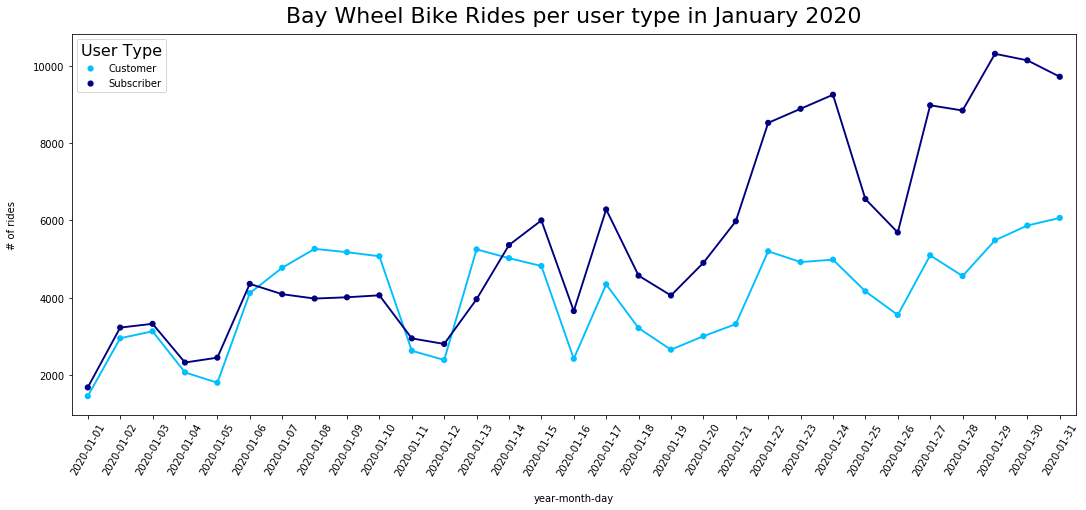

In [4]:
plt.figure(figsize=(18,7))

bay_wheels_user_type_count_df = bay_wheels_main_df.groupby(["start_time", "user_type"]).size().reset_index()

my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sns.pointplot(x='start_time', y=0, hue='user_type', palette=my_palette, scale=.7, data = bay_wheels_user_type_count_df)
plt.title('Bay Wheel Bike Rides per user type in January 2020', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of rides', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
plt.xticks(rotation=60)

The result of visualization 1:

- The figure is shown the the distribution of number of bike rides in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- While the number of customers exceeds the number of subscribers for the usage of riding a bike in some days of January, vice-versa in other days of January. However, when looking the general trend of the number of rides per user type , the number of subcribers are more than the number of customers.

### Visulization 2 : What is the distribution of trip time duration for bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

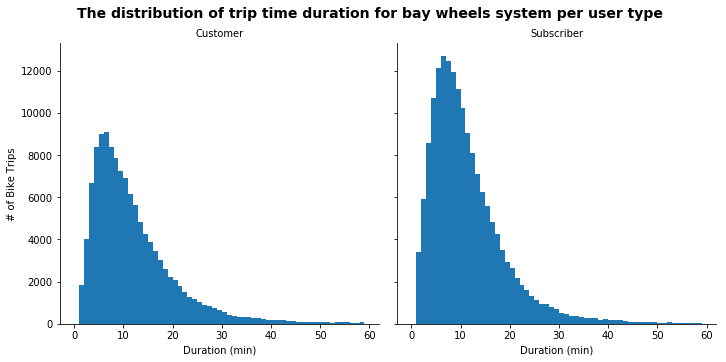

In [5]:
plt.figure(figsize=(18,7))
g = sns.FacetGrid(bay_wheels_main_df, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0,60,1)
base_color = sns.color_palette()[0]
g.map(plt.hist, "duration_min", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (min)", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('The distribution of trip time duration for bay wheels system per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 2:

- All these two figures are shown the the distribution of trip time durations for bay wheels system in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- The trip duration in minutes of both customer and subcribers for bay wheels system are ranged from 0 - 60 minutes.

- According to both customer and subcriber, while most people use the bay wheel system to ride a bike in approximately 0 - 10 minutes, not too much people have been riding a bike for more than 10 minutes.

- When looking the number of bike trips for bay wheels system in both figures, the number of bike trips for bay wheels system in Customer is less than Subscriber's numbers.

- All thes two figures are right-skewed graph because most variable of each figure are located left-hand side.

### Visulization 3 : What is the distribution of distance in km for bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

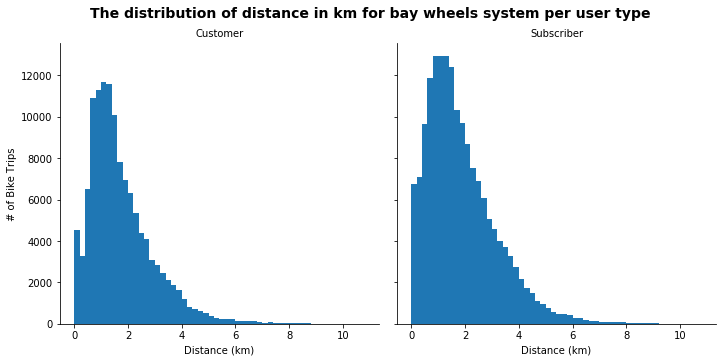

In [6]:
plt.figure(figsize=(18,7))
g = sns.FacetGrid(bay_wheels_main_df, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0,11,0.2)
base_color = sns.color_palette()[0]
g.map(plt.hist, "distance_km", color=base_color, bins=bin_edges)
g.set_axis_labels("Distance (km)", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('The distribution of distance in km for bay wheels system per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 3:

- All these two figures are shown the the distribution of distance in km for bay wheels system in each day of January 2020 consecutively in terms of the user type as Customer and Subcriber.

- The distance in km of both customer and subcribers for bay wheels system are ranged from 0 - 10 km.

- According to both customer and subcriber, while most people use the bay wheel system to ride a bike in approximately 0 - 2 km, not too much people have been riding a bike for more than 2 km.

- When looking the number of bike trips for bay wheels system in both figures, the number of bike trips for bay wheels system in Customer is little less than Subscriber's numbers.

- All thes two figures are right-skewed graph because most variable of each figure are located left-hand side.

### Visulization 4 : What is the distribution of the weekday usage of bay wheels system in terms of user type in January 2020?

<Figure size 1296x504 with 0 Axes>

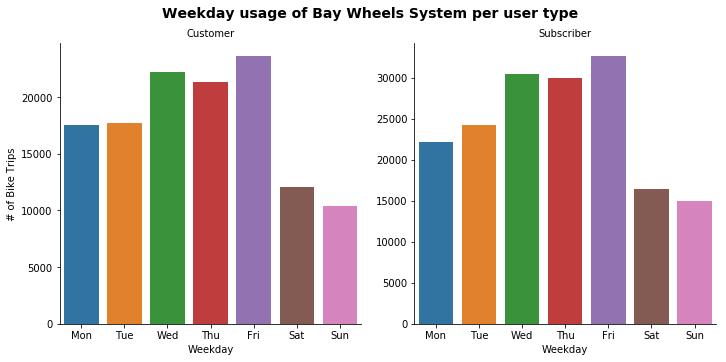

In [7]:
# weekday usege of the bike sharing system per user type
plt.figure(figsize=(18,7))
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=bay_wheels_main_df, x='start_time_weekday_abbr', col="user_type", kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "# of Bike Trips")
plt.subplots_adjust(top=0.9)
g.set_titles("{col_name}")
g.fig.suptitle('Weekday usage of Bay Wheels System per user type', y=1, fontsize=14, fontweight='semibold');

The result of visualization 4:

- All these two figures are shown the distribution of the weekday usage of bay wheels system in terms of user type in January 2020.

- The figure of Customer's weekday usage of Bay Wheels System is affinity with Subcriber's ones except for the number of bike trips. The number of bike trips for Subcriber's weekday usage of Bay Wheels System is more than Customer's one.

### Visulization 5 : What is the hourly usage of bay wheels system during week in terms of user type in January 2020?

Text(0.5, 0.98, 'The Hourly Usage of Bay Wheels System During Week')

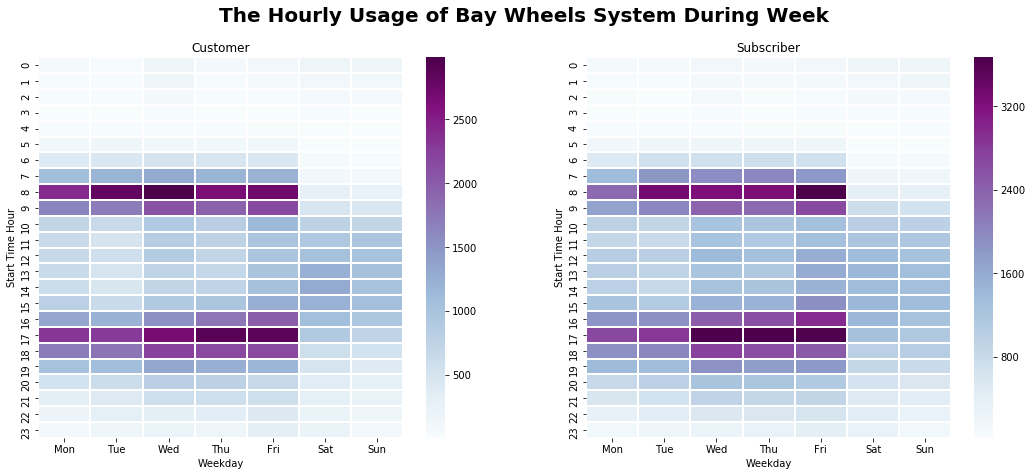

In [8]:
plt.figure(figsize=(18,7))

# Setting the weekday consecutively
bay_wheels_main_df['start_time_weekday_abbr'] = pd.Categorical(bay_wheels_main_df['start_time_weekday_abbr'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = bay_wheels_main_df.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(df_customer, cmap="BuPu", linewidths=1 )

plt.title("Customer", y=1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = bay_wheels_main_df.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday_abbr"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday_abbr", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu", linewidths=1)

plt.title("Subscriber", y = 1)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour');

plt.suptitle('The Hourly Usage of Bay Wheels System During Week', fontsize=20, fontweight="semibold")


The result of visualization 5:

- All these figures are shown the hourly usage of bay wheels system during week in terms of user type in January 2020.

- The figure of Customer's hourly usage of Bay Wheels System is little affinity with Subcriber's ones except for the number of bike trips. The number of bike trips for Subcriber's hourly usage of Bay Wheels System is more than Customer's one.

- For both the figures of Customer and Subcriber, 8pm, 9pm, 16am, 17am and lasty 18am of all weekdays are the most effective time schedule for the usage of bay wheel system.

- For the denstity of two graph, subcribers are more active to use the bay wheel system during 8pm, 9pm, 16am, 17am and lasty 18am of all weekdays than customers.

### Visulization 6 :What is the mean of trip duration in min of bay wheels System in terms of day of week and hour for all user types in January 2020?

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week and Hour of Bay Wheel System in January 2020')

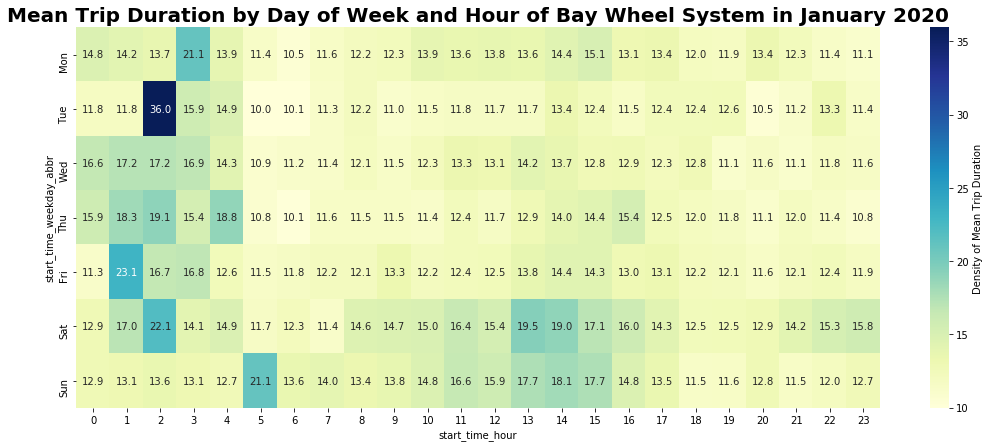

In [9]:
plt.figure(figsize=(18,7))

pivot = bay_wheels_main_df.pivot_table(values='duration_min',index='start_time_weekday_abbr',columns='start_time_hour')
sns.heatmap(pivot, annot=True, fmt='.1f', cbar_kws = {'label' : 'Density of Mean Trip Duration'}, cmap='YlGnBu')
plt.title("Mean Trip Duration by Day of Week and Hour of Bay Wheel System in January 2020", fontsize=20, fontweight="semibold")

The result of visualization 6:

- This figure is shown the mean of trip duration for each user types in terms of weekday and hour schedule in January.

- The density of mean trip is low so that both customer and subscribers only just prefer to rent a bide for the usage of their needs and pleasure time with respect to weekday and hour schedule.

- The highest mean of trip duration is 36.0 at 2.00 am on Tuesday for each week of January.

### Visulization 7 : What is the trip duration in min for each user type of bay wheels System in terms of day of week and hour in January 2020?

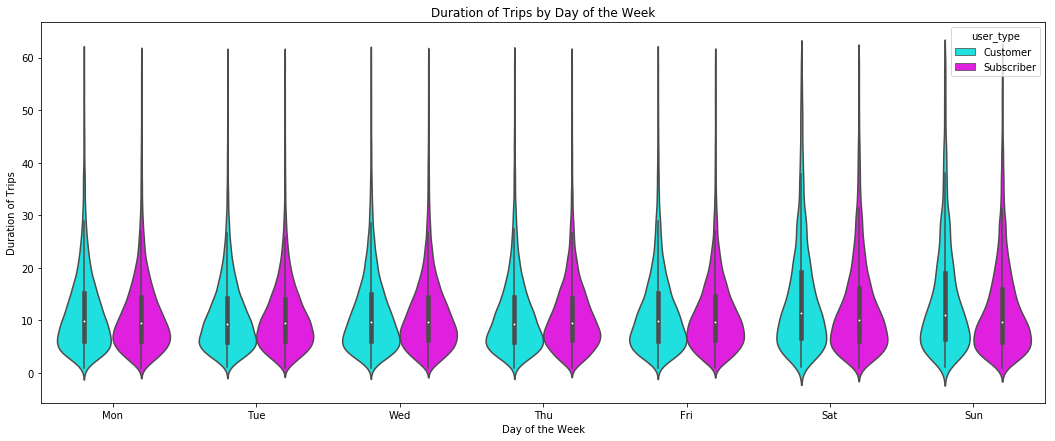

In [11]:
plt.figure(figsize=(18,7))
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.violinplot(x='start_time_weekday_abbr', 
               y='duration_min', 
               data= bay_wheels_main_df[bay_wheels_main_df['duration_min']<60], 
               hue="user_type" , 
               palette= {"Customer": "cyan", "Subscriber": "magenta"}, 
               order = day_order)

plt.title("Duration of Trips by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Duration of Trips');
plt.show()

The result of visualization 7:

- The figure is shown the trip duration in min by day of week in terms of each user types whose names are Customer and Subscriber in January.

- Most trip duration of each day for both Customer and Subscriber is up to 30 minutes becuase the denstity of the trip duration is mostly located at the bottom of plot. 

<a id='conclusion'></a>
### Part II - Conclusion

- In the first visualization, when looking the general trend of the usage of two user types in each day of January 2020, subcribers are more active to use this system than customers.

- In the second visualization, when looking the general trend of the distribution of trip time duration in minutes from start station through end station in terms of two user types in each day of January 2020, subcribers are more active to use this system than customers.   

- In the third visualization, when looking the general trend of the distribution of distance in km from start station through end station in terms of two user types in each day of January 2020, subcribers are more active to use this system than customers. 

- In the fourth visualization, when looking the general trend of the usage of the bay wheel system during all week in terms of two user types in each day of January 2020, subcribers are more active to use it than customers.  

- In the fifth visualization,subcribers are more active to use the bay wheel system during 8pm, 9pm, 16am, 17am and lasty 18am of all weekdays than customers with respect to their time schedule for work and pleasure time.  